In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option("display.max_columns",None)

In [2]:
data = pd.read_csv("C:\\Users\\sanja\\Downloads\\Walmart.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
data.isna().sum() # checking for any null values in columns

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
data.nunique() # unique values per column

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

EDA

In [8]:
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [10]:
data['Days'] = data['Date'].dt.day
data['Months'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days,Months,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


C:\Users\sanja\AppData\Local\Temp\ipykernel_9112\3101228329.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Days', y='Weekly_Sales', data=day_grp, palette='magma')


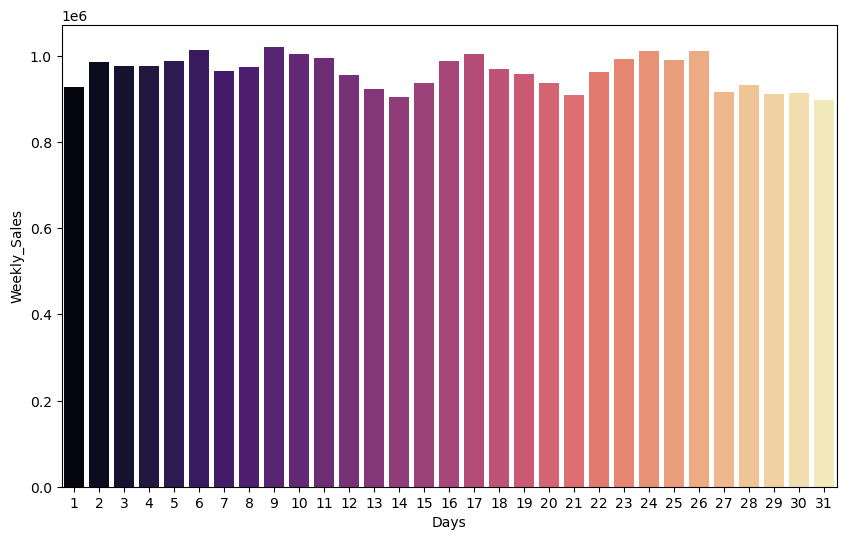

In [11]:
day_grp = data.groupby(['Days'])['Weekly_Sales'].median().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Days', y='Weekly_Sales', data=day_grp, palette='magma')
plt.show()

C:\Users\sanja\AppData\Local\Temp\ipykernel_9112\1463440768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Months', y = 'Weekly_Sales', data = month_grp, palette = 'magma')


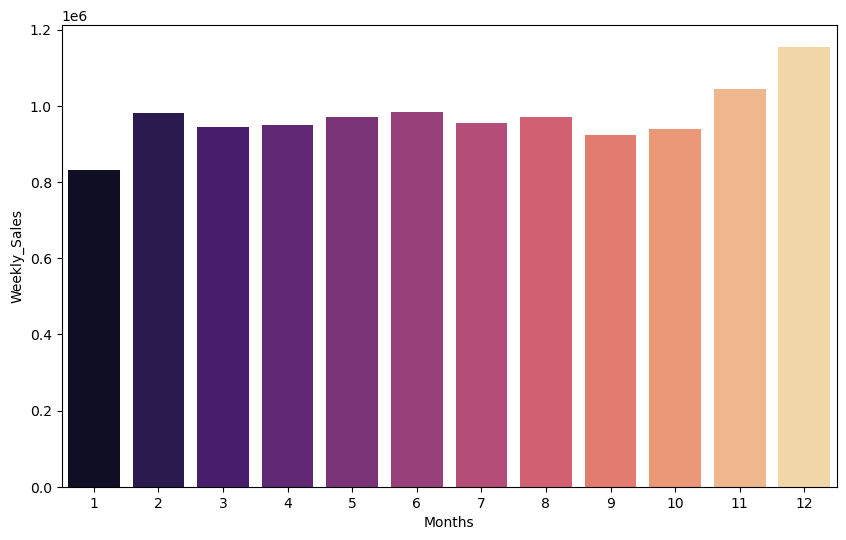

In [12]:
month_grp = data.groupby(['Months'])['Weekly_Sales'].median().reset_index()
plt.figure(figsize = (10,6))
sns.barplot(x = 'Months', y = 'Weekly_Sales', data = month_grp, palette = 'magma')
plt.show()

C:\Users\sanja\AppData\Local\Temp\ipykernel_9112\3747278480.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Year', y = 'Weekly_Sales', data = year_grp, palette = 'magma')


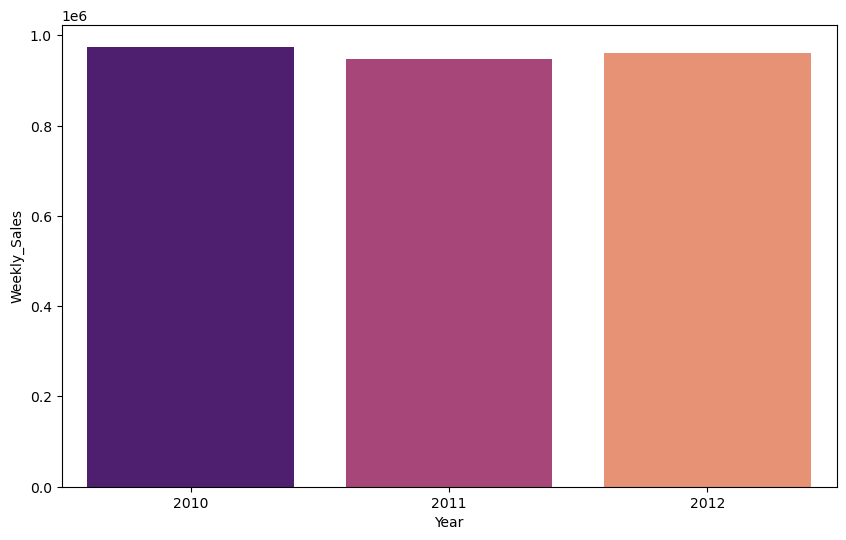

In [13]:
year_grp = data.groupby(['Year'])['Weekly_Sales'].median().reset_index()
plt.figure(figsize = (10,6))
sns.barplot(x = 'Year', y = 'Weekly_Sales', data = year_grp, palette = 'magma')
plt.show()

In [14]:
data['Day_cut']= pd.qcut(data['Days'], 5)
data['Days'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6435 entries, 0 to 6434
Series name: Days
Non-Null Count  Dtype
--------------  -----
6435 non-null   int32
dtypes: int32(1)
memory usage: 25.3 KB


In [15]:
data['Day_cut'].value_counts()

Day_cut
(6.0, 13.0]     1485
(0.999, 6.0]    1305
(13.0, 19.0]    1260
(19.0, 25.0]    1260
(25.0, 31.0]    1125
Name: count, dtype: int64

In [16]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days,Months,Year,Day_cut
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,"(0.999, 6.0]"
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,"(6.0, 13.0]"
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,"(13.0, 19.0]"
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,"(25.0, 31.0]"
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,"(0.999, 6.0]"


C:\Users\sanja\AppData\Local\Temp\ipykernel_9112\3622709736.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  week = data.groupby(['Day_cut'])['Weekly_Sales'].median().reset_index()
C:\Users\sanja\AppData\Local\Temp\ipykernel_9112\3622709736.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Day_cut',y = 'Weekly_Sales', data = week , palette = 'magma')


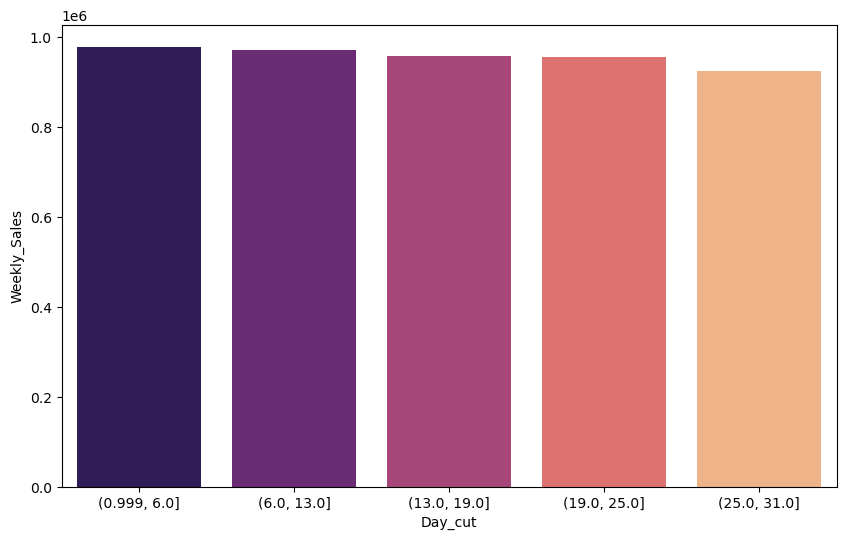

In [17]:
week = data.groupby(['Day_cut'])['Weekly_Sales'].median().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x = 'Day_cut',y = 'Weekly_Sales', data = week , palette = 'magma')
plt.show()

In [18]:
data.loc[(data['Days'] > 0.999) & (data['Days'] <= 6.0), 'Days']= 3
data.loc[(data['Days'] > 6.0) & (data['Days'] <= 13.0), 'Days']= 2
data.loc[(data['Days'] > 13.0) & (data['Days'] <= 19.0), 'Days']= 1
data.loc[(data['Days'] > 19.0) & (data['Days'] <= 25.0), 'Days']= 4
data.loc[(data['Days'] > 25.0) & (data['Days'] <= 31.0), 'Days']= 0
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days,Months,Year,Day_cut
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,3,2,2010,"(0.999, 6.0]"
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2,2010,"(6.0, 13.0]"
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1,2,2010,"(13.0, 19.0]"
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0,2,2010,"(25.0, 31.0]"
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,3,2010,"(0.999, 6.0]"


In [19]:
data['Days'].value_counts()

Days
2    1485
3    1305
1    1260
4    1260
0    1125
Name: count, dtype: int64

In [20]:
data['Week_Importance']= data['Days']

In [21]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days,Months,Year,Day_cut,Week_Importance
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,3,2,2010,"(0.999, 6.0]",3
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2,2010,"(6.0, 13.0]",2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1,2,2010,"(13.0, 19.0]",1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0,2,2010,"(25.0, 31.0]",0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,3,2010,"(0.999, 6.0]",3


C:\Users\sanja\AppData\Local\Temp\ipykernel_9112\3095491415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Holiday_Flag', y = 'Weekly_Sales', data = holiday_grp, palette = 'magma')


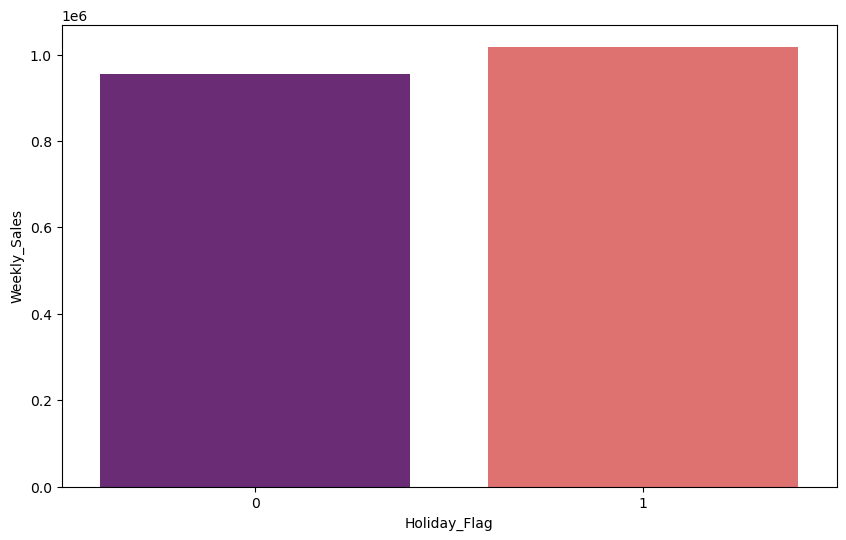

In [22]:
holiday_grp = data.groupby(['Holiday_Flag'])['Weekly_Sales'].median().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x = 'Holiday_Flag', y = 'Weekly_Sales', data = holiday_grp, palette = 'magma')
plt.show()

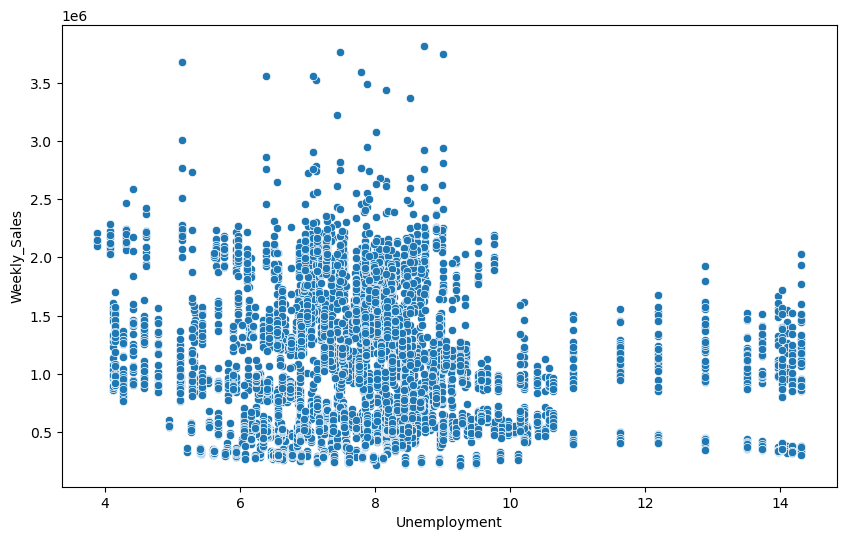

In [23]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Unemployment', y = 'Weekly_Sales', data = data)
plt.show()

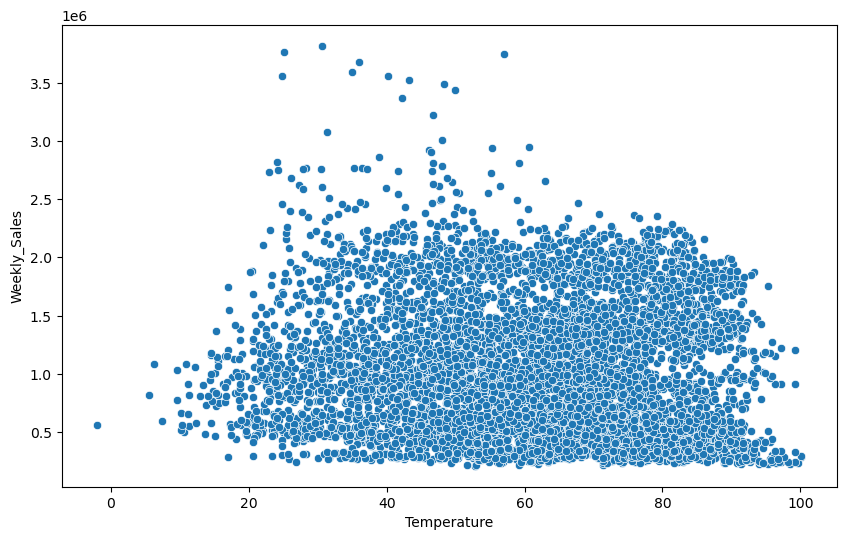

In [24]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Temperature', y = 'Weekly_Sales', data = data)
plt.show()

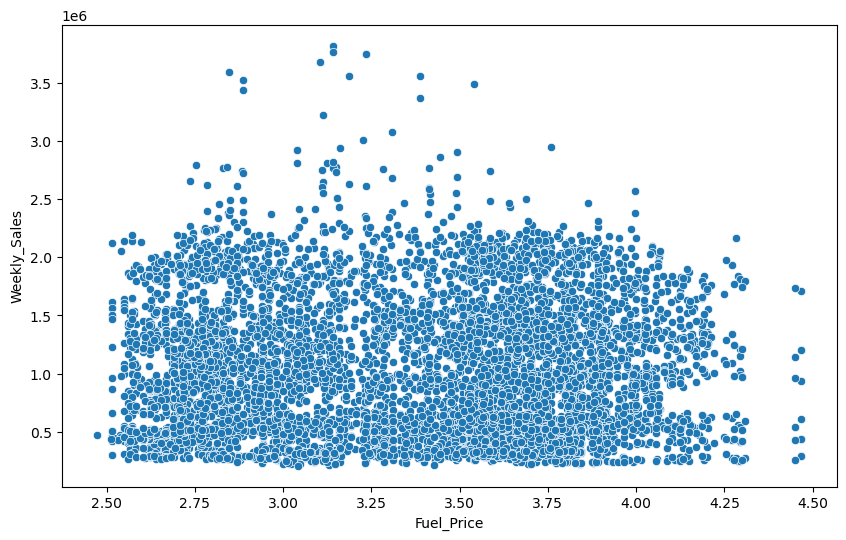

In [25]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Fuel_Price', y = 'Weekly_Sales', data = data)
plt.show()

MODEL TRAINING

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [28]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days,Months,Year,Day_cut,Week_Importance
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,3,2,2010,"(0.999, 6.0]",3
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2,2010,"(6.0, 13.0]",2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1,2,2010,"(13.0, 19.0]",1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0,2,2010,"(25.0, 31.0]",0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,3,2010,"(0.999, 6.0]",3


In [29]:
data = data.drop(columns = ['Days','Date','Year','Day_cut'])

In [30]:
x = data.drop(columns = ['Weekly_Sales'])
y = data['Weekly_Sales']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
model = RandomForestRegressor()

In [31]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [65]:
model.score(x_test, y_test)

0.9620413983788606

In [67]:
from sklearn.metrics import r2_score

In [69]:
y_pred= model.predict(x_test)
r2_score(y_pred,y_test)

0.9613729618759562